<a href="https://colab.research.google.com/github/sikendarsah/100-days-of-java/blob/master/Text_Classification_using_NLTK_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sikendarsah909","key":"cc2e78242320b676207b879d67d12d0a"}'}

In [ ]:
#create a kaggle folder
!mkdir ~/.kaggle

In [ ]:
#copy the kaggle.json to foldere created
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d crawford/20-newsgroups

 66% 17.0M/25.7M [00:00<00:00, 38.1MB/s]
100% 25.7M/25.7M [00:00<00:00, 49.1MB/s]


In [ ]:
!unzip 20-newsgroups.zip

Archive:  20-newsgroups.zip
  inflating: alt.atheism.txt         
  inflating: comp.graphics.txt       
  inflating: comp.os.ms-windows.misc.txt  
  inflating: comp.sys.ibm.pc.hardware.txt  
  inflating: comp.sys.mac.hardware.txt  
  inflating: comp.windows.x.txt      
  inflating: list.csv                
  inflating: misc.forsale.txt        
  inflating: rec.autos.txt           
  inflating: rec.motorcycles.txt     
  inflating: rec.sport.baseball.txt  
  inflating: rec.sport.hockey.txt    
  inflating: sci.crypt.txt           
  inflating: sci.electronics.txt     
  inflating: sci.med.txt             
  inflating: sci.space.txt           
  inflating: soc.religion.christian.txt  
  inflating: talk.politics.guns.txt  
  inflating: talk.politics.mideast.txt  
  inflating: talk.politics.misc.txt  
  inflating: talk.religion.misc.txt  


In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('list.csv')

In [ ]:
df

,newsgroup,document_id
0,talk.religion.misc,82757
1,talk.religion.misc,82758
2,talk.religion.misc,82759
3,talk.religion.misc,82760
4,talk.religion.misc,82763
...,...,...
623,talk.religion.misc,84564
624,talk.religion.misc,84565
625,talk.religion.misc,84568
626,talk.religion.misc,84569


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   newsgroup    628 non-null    object
 1   document_id  628 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.9+ KB


In [ ]:
df.columns

Index(['newsgroup', 'document_id'], dtype='object')

In [ ]:
df.describe()

,document_id
count,628.000000
mean,83918.148089
std,439.727869
min,82757.000000
25%,83649.000000
50%,84047.500000
75%,84248.250000
max,84570.000000


**1. Perform tokenization, stop words removal, and stemming on the dataset**

Tokenization of Text

In [ ]:
import spacy
print(spacy.__name__,spacy.__version__)

spacy 3.7.4


In [ ]:
nlp=spacy.load("en_core_web_sm")

In [ ]:
import nltk


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
filename="/content/talk.religion.misc.txt"
file=open(filename,"r",encoding="ISO-8859-1")
text=file.read()
text=text.replace("\n"," ")
tokenizer=nltk.data.load("tokenizers/punkt/english.pickle")
sentences = tokenizer.tokenize(text)
for token in sentences:
  print(token)
#print(sentences)

Streaming output truncated to the last 5000 lines.
Boggs et al.)
may be out to harm and destroy us.
As a matter of fact, prophecies in my church indicate that in future years, (global) persecution against Mormons will so increase in intensity and scope, that (paraphrasing) "all those who wish to escape persecution and murder must flee to Zion."
Zion (the "pure in heart") will be re-established in those days, and it AIN'T our current secular authorities who will rule over it...  #>...  David Koresh did NOT pose a great #>threat to the federal authorities or the security of this nation, and with #>John, I too wonder who or what's next... # #I personally feel that we should try to stop anyone who is a threat to the #life of even one person.
Sure, he did not pose a threat to the security of #this nation.
But he did pose a threat to the lives of his followers.
That #much is definite.
Hmmm.
"definite" by whom?
--Until such has been established beyond reason- able doubt, this alleged "threat"

Stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

with open("talk.religion.misc1.txt", "r") as f:
    text = f.read()

stop_words = set(stopwords.words("english"))
filtered_text = " ".join([word for word in text.split() if word not in stop_words])

with open("filtered_file.txt", "w") as f:
    f.write(filtered_text)

print(filtered_text)

Newsgroup: talk.religion.misc document_id: 82757 From: dsoconne@quads.uchicago.edu (Daniel S OConnell) Subject: Re: Religion homosexuality > magarret@magnus.acs.ohio-state.edu (COMPUTER DUDETTE) writes: >I recently realized I bisexual, also recently returned >religion, good friend pointed homosexuality >is sin bible. Well, I see could considered sin, First far I know, male homosexuality explicitly mentioned bibles, hook there, I think. In event, *plenty* people many denominations consider person's sexual identification gay/lesbian/bisexual "immoral lifestyle choice" >Also, I always somewhat liberal feminist, pro-choice, >seems pro-choice religious mix either. I told This another misconception. You told whole story. My former minister lesbian, I know personally professionally several openly gay lesbian ministers. I Unitarian-Universalist like others denomination, pro-choice. You go looking Unitarian Universalists (which liberal religion) acceptance sexual identification pro-choice views

Stemming

In [ ]:
import nltk
from nltk.stem import PorterStemmer
filename="/content/talk.religion.misc.txt"
file=open(filename,"r",encoding="ISO-8859-1")
text=file.read()
# Initialize stemmer
stemmer = PorterStemmer()

# Tokenize text (split into words)
words = text.lower().split()

# Stem each word and store in a list
stemmed_words = [stemmer.stem(word) for word in words]

# Write stemmed words to a new file or print them
with open("stemmed_output.txt", "w") as f:
    f.write(" ".join(stemmed_words))

# Or print directly
print(" ".join(stemmed_words))

newsgroup: talk.religion.misc document_id: 82757 from: dsoconne@quads.uchicago.edu (daniel s oconnell) subject: re: religion and homosexu > magarret@magnus.acs.ohio-state.edu (comput dudette) writes: >i just recent realiz that i am bisexual, and also just recent return to >religion, and have a good friend who ha point out to me that homosexu >i a sin in the bible. well, i don't see how it could be consid a sin, first of all as far as i know, onli male homosexu is explicitli mention in the bibles, so you'r off the hook there, i think. in ani event, there are *plenty* of peopl in mani denomin who do not consid a person' sexual identif of gay/lesbian/bisexu as an "immor lifestyl choice" >also, i have alway been a somewhat liber feminist, and am pro-choice, and it >seem that be pro-choic and be religi don't mix either. i am told thi is anoth misconception. you are not be told the whole story. my former minist is a lesbian, and i know person and profession sever openli gay and lesbian minis

# 2. Use TF-IDF to convert text data into numerical data.
# 3. Train a classifier (Naive Bayes or SVM) on the processed data.
# 4. Evaluate the classifier on a test set

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()

In [ ]:
categories = data.target_names
train_data = fetch_20newsgroups(subset = "train",shuffle=True)
test_data = fetch_20newsgroups(subset = "test",shuffle=True)

In [ ]:
categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
len(train_data.data)


11314

In [ ]:
len(test_data.data)

7532

#Training and Testing

In [ ]:
categories,frequency_train = np.unique(train_data.target, return_counts= True)
categories,frequency_train

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
        594, 593, 599, 546, 564, 465, 377]))

In [ ]:
categoris = np.array(train_data.target_names)

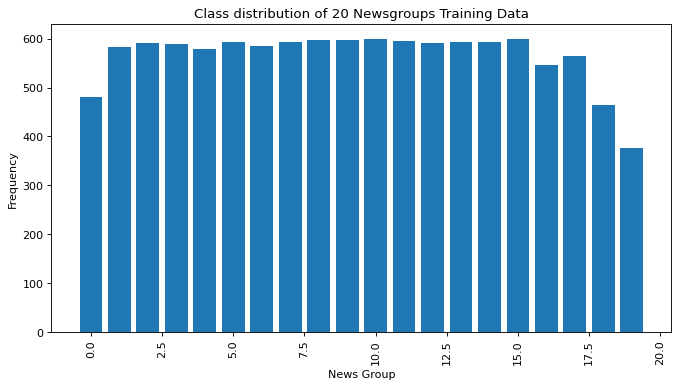

In [ ]:
fig=plt.figure(figsize=(10,5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(categories,frequency_train)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Training Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

In [ ]:
def flatten(list):
  new_list = []
  for i in list:
    for j in i:
      new_list.append(j)
      return new_list

In [ ]:
traindata=flatten(train_data.data)

In [ ]:
len(traindata)

1

In [ ]:
testdata=flatten(test_data.data)

In [ ]:
len(testdata)

1

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec =CountVectorizer()
X_train_count = count_vec.fit_transform(train_data.data)
X_test_count = count_vec.transform(test_data.data)

TF-IDF conversion

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
Tfid_transformer =TfidfTransformer()
X_train_tfidf =Tfid_transformer.fit_transform(X_train_count)
X_test_tfidf = Tfid_transformer.transform(X_test_count)
X_test_tfidf.shape

(7532, 130107)

#Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
y_train =train_data.target
nb.fit(X_train_count,y_train)

MultinomialNB()

In [ ]:
y_pred_nb = nb.predict(X_test_count)
y_pred_nb

array([ 7, 11,  0, ...,  9,  3, 15])

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
y_test=test_data.target
print(accuracy_score(y_test,y_pred_nb))

0.7728359001593202


In [ ]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       319
           1       0.67      0.74      0.70       389
           2       0.20      0.00      0.01       394
           3       0.56      0.77      0.65       392
           4       0.84      0.75      0.79       385
           5       0.65      0.84      0.73       395
           6       0.93      0.65      0.77       390
           7       0.87      0.91      0.89       396
           8       0.96      0.92      0.94       398
           9       0.96      0.87      0.91       397
          10       0.93      0.96      0.95       399
          11       0.67      0.95      0.78       396
          12       0.79      0.66      0.72       393
          13       0.87      0.82      0.85       396
          14       0.83      0.89      0.86       394
          15       0.70      0.96      0.81       398
          16       0.69      0.91      0.79       364
          17       0.85    

In [ ]:
y_predict_train = nb.predict(X_train_count)
nb.score(X_train_count,y_train)

0.9245182959165635

In [ ]:
print(classification_report(y_train,y_predict_train))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       480
           1       0.85      0.97      0.90       584
           2       0.98      0.14      0.25       591
           3       0.70      0.96      0.81       590
           4       0.95      0.98      0.97       578
           5       0.80      0.98      0.88       593
           6       0.97      0.85      0.91       585
           7       0.96      0.98      0.97       594
           8       0.99      0.98      0.99       598
           9       1.00      0.99      0.99       597
          10       0.98      0.99      0.98       600
          11       0.92      0.99      0.95       595
          12       0.95      0.96      0.96       591
          13       0.98      0.98      0.98       594
          14       0.97      1.00      0.99       593
          15       0.92      0.99      0.95       599
          16       0.95      0.99      0.97       546
          17       0.96    

In [ ]:
print(test_data.target)
print(y_pred_nb)

[ 7  5  0 ...  9  6 15]
[ 7 11  0 ...  9  3 15]


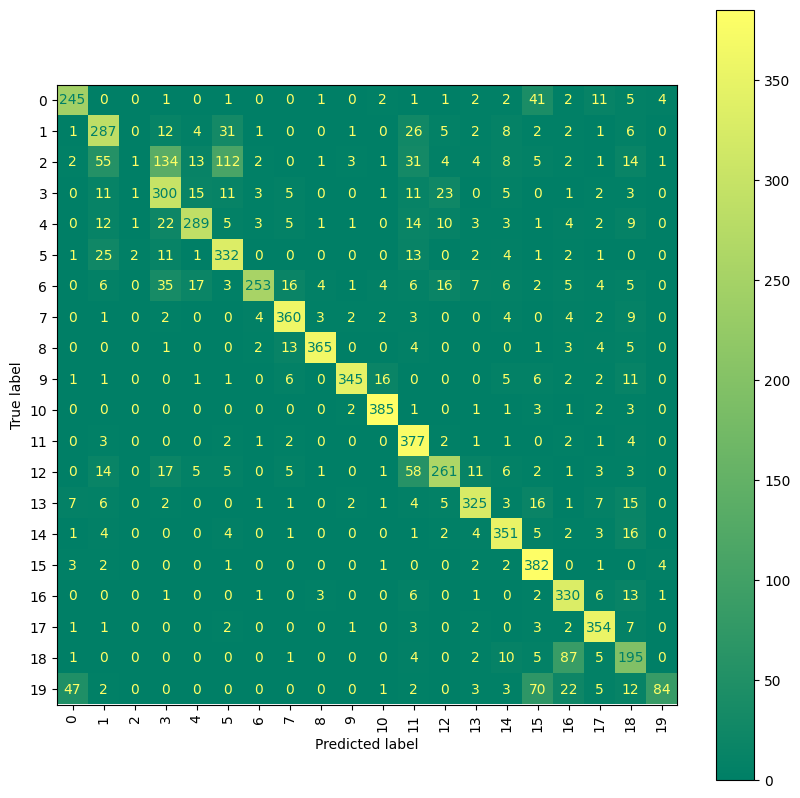

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred_nb)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=categories)
fig,ax = plt.subplots(figsize=(10,10))
disp = disp.plot(xticks_rotation = 'vertical', ax=ax, cmap='summer')
plt.show()

#**Support Vector Machine(SVM)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
X_train=tf.fit_transform(train_data.data)
X_test=tf.transform(test_data.data)
X_train.shape, X_test.shape

((11314, 130107), (7532, 130107))

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC()

In [ ]:
svc.fit(X_train,y_train)


#Evaluating the classifier on a test set

In [ ]:
y_pred_svc = svc.predict(X_test)
y_pred_svc

array([12,  1,  0, ...,  9, 12, 15])

In [ ]:
print(accuracy_score(y_test, y_pred_svc))

0.8186404673393521


In [ ]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.83      0.71      0.76       319
           1       0.62      0.82      0.71       389
           2       0.80      0.70      0.75       394
           3       0.73      0.78      0.76       392
           4       0.82      0.83      0.82       385
           5       0.83      0.73      0.77       395
           6       0.73      0.91      0.81       390
           7       0.90      0.87      0.89       396
           8       0.96      0.93      0.95       398
           9       0.88      0.91      0.90       397
          10       0.97      0.91      0.94       399
          11       0.96      0.85      0.90       396
          12       0.65      0.85      0.74       393
          13       0.88      0.78      0.82       396
          14       0.93      0.88      0.90       394
          15       0.79      0.92      0.85       398
          16       0.75      0.88      0.81       364
          17       0.97    

In [ ]:
y_predict_train = nb.predict(X_train_count)
nb.score(X_train_count,y_train)

0.9245182959165635

In [ ]:
print(classification_report(y_train,y_predict_train))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       480
           1       0.85      0.97      0.90       584
           2       0.98      0.14      0.25       591
           3       0.70      0.96      0.81       590
           4       0.95      0.98      0.97       578
           5       0.80      0.98      0.88       593
           6       0.97      0.85      0.91       585
           7       0.96      0.98      0.97       594
           8       0.99      0.98      0.99       598
           9       1.00      0.99      0.99       597
          10       0.98      0.99      0.98       600
          11       0.92      0.99      0.95       595
          12       0.95      0.96      0.96       591
          13       0.98      0.98      0.98       594
          14       0.97      1.00      0.99       593
          15       0.92      0.99      0.95       599
          16       0.95      0.99      0.97       546
          17       0.96    

In [ ]:
print(test_data.target)
print(y_pred_nb)

[ 7  5  0 ...  9  6 15]
[ 7 11  0 ...  9  3 15]


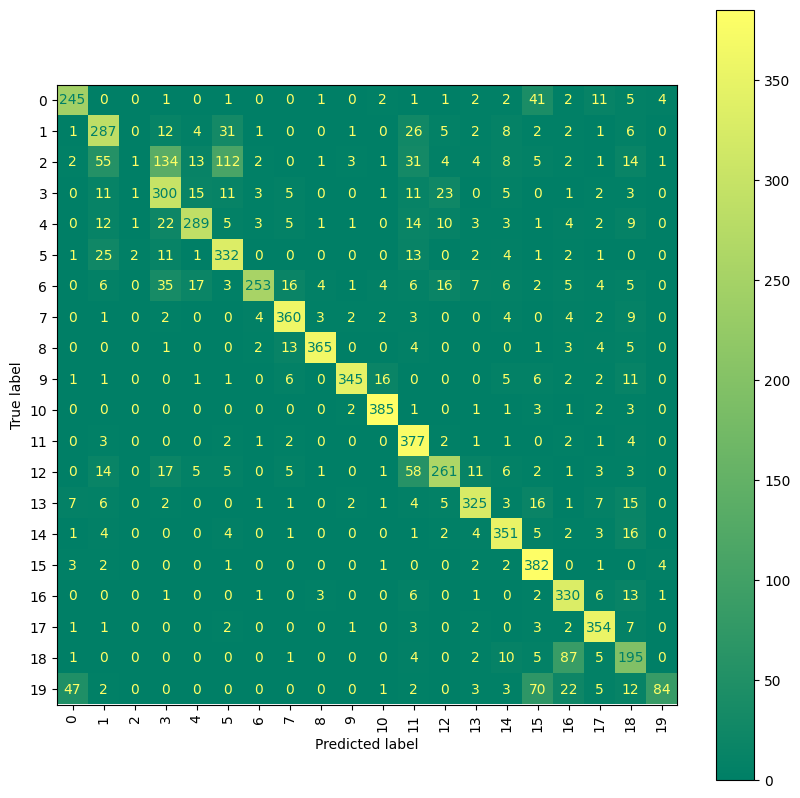

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=categories)
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')
plt.show()